# Optimal Path Simulator: Physiscs Optimization - Worksheet 7

Given a mathematical function $V(x, y)$ that assigns a potential value to each point in a 2D domain, and given a starting point $(x_0, y_0)$ and an ending point $(x_N, y_N)$, we want to find the path that requires the minimum effort to travel from the starting point to the ending point.


In [171]:
# from phi.flow import *
import numpy as np
import matplotlib.pyplot as plt

## (a) Potential

First we implement the potential landscape by defining a function that maps a position variable to a scalar. 
<br> In this case we define a radially-symmetric potential $f$:

$$
f(x, y) = (x^2 + y^2 - 1)^2 
$$


In [172]:
def potential(x, y):
    return (x**2 + y**2 - 1)**2

## (b) Dynamics

$$
\begin{pmatrix} x_1 \\ y_1 \end{pmatrix} = \begin{pmatrix} x_0 \\ y_0 \end{pmatrix} + \begin{pmatrix} \Delta x \\ F_0 \end{pmatrix}
$$

$(x_0,y_0): \quad$ Initial state

$(x_N, y_N): \quad$ Final state

$\Delta x: \quad$ Fixed distance for the movement along $x$ direction

$F_0: \quad$ Variable force for the movement along $y$ direction ($F$ vector of forces)

In [173]:
def path(x0, y0, delta_x, F):

    positions_x = [x0]
    positions_y = [y0]
    x = x0 
    y = y0

    for F0 in F:
        x = x + delta_x
        y = y + F0

        positions_x.append(x)
        positions_y.append(y)

    return np.array(positions_x), np.array(positions_y)

## (c) Loss

We define the loss function as the sum of the potential of all points $(x_i, y_i), \quad i = 0,1,...,N$

In [242]:
def loss(x, y):
    return np.sum(potential(x[1:],y[1:]))

## (d) Optimization

In [243]:
def gradient(x,y):
    return 4*y*(x**2 + y**2 - 1)


In [323]:
learning_rate = 0.001
momentum = 0.8
steps = 500

def gradient_descent(x, y, delta_x, F):
    v = np.zeros_like(F)
    for i in range(steps):
        x, y = path(x[0], y[0], delta_x, F)
        
        grad = gradient(x[1:],y[1:])
        v = momentum*v - learning_rate*grad
        F = F + v
        
        l = loss(x,y)
        if l < 0.01:
            break;

        if (i+1) % 50 == 0 or i == 0 :
            print(f"Iteration {i+1}: Loss = {l}")

    return x,y
    

## Output

In [333]:
x = np.linspace(-1.25, 1.25, 400)
y = np.linspace(-1.25, 1.25, 400)
X, Y = np.meshgrid(x, y)
Z = potential(X, Y)

In [334]:
x0 = -1.0
y0 = 0.0
N = 20
delta_x = 0.1
F = np.random.uniform(-0.1, 0.1, N-1) 
x,y = path(x0, y0, delta_x, F)

opt_x, opt_y = gradient_descent(x, y, delta_x, F)

Iteration 1: Loss = 7.591617433045505
Iteration 50: Loss = 3.1981971439247445
Iteration 100: Loss = 0.6223056092458232
Iteration 150: Loss = 0.1648051487433549
Iteration 200: Loss = 0.0688652837058914
Iteration 250: Loss = 0.03496596289217806
Iteration 300: Loss = 0.02307706210392859
Iteration 350: Loss = 0.01782854711983365
Iteration 400: Loss = 0.013311987442701822


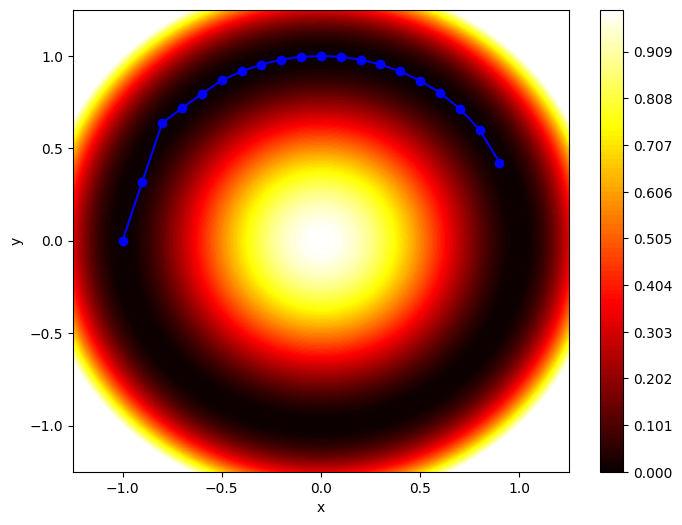

In [337]:
plt.figure(figsize=(8, 6))
p = plt.contourf(X, Y, Z, levels=np.linspace(0, 1, 100), cmap='hot')
plt.plot(opt_x, opt_y, marker='o', linewidth=1.5, color='b')
plt.colorbar(p)
plt.xlabel('x')
plt.ylabel('y')
plt.show()